In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x11209e1f0>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from gfcat_utils import *

In [3]:
import numpy as np
from astropy.io import fits as pyfits
from astropy import wcs as pywcs
from astropy.visualization import simple_norm, ZScaleInterval
from photutils import DAOStarFinder, CircularAperture, aperture_photometry


In [4]:
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [50]:
eclipse = 7068
e = str(eclipse).zfill(5)
print(f"Processing e{e}...")
band = 'FUV'
b = band[0].lower()+'d'
tmpdir = "/Users/cm/GFCAT/gfcat/tmp/"
lc_filename = f"/Users/cm/github/gphoton_working/test_data/e{e}/e{e}-{b}-30s-photom-12_8.csv"
fn = f"/Users/cm/github/gphoton_working/test_data/e{e}/e{e}-{b}-full-rice.fits"
fn_mov = f"/Users/cm/github/gphoton_working/test_data/e{e}/e{e}-{b}-30s-rice.fits"
lc = parse_lightcurves(lc_filename)

Processing e07068...

(500.0, 1000.0)

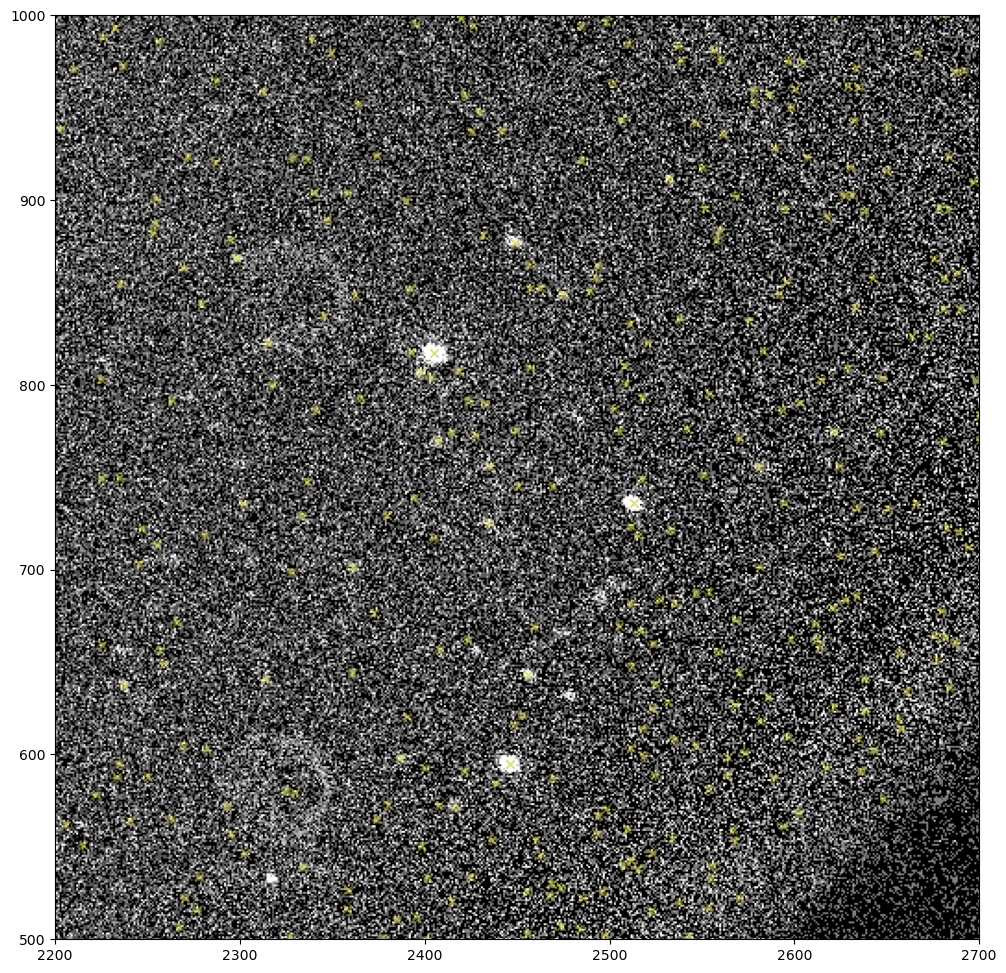

In [60]:
image,flagmap,edgemap,wcs,tranges,exptimes=read_image(fn,hdunum=1)
image[np.where(np.isinf(image))]=0 # because it pops out with inf values... IDK
#image[np.where(flagmap)]=0.
x = [source['xcenter'] for source in lc]
y = [source['ycenter'] for source in lc]
plt.figure(figsize=(12,12))
plt.imshow(ZScaleInterval()(image),cmap="Greys_r",origin="lower",alpha=1-opacity)
plt.scatter(x,y,c='y',marker='x',alpha=0.5)
plt.xlim([2200,2700])
plt.ylim([500,1000])
#plt.xticks([])
#plt.yticks([])

In [55]:
image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])